In [1]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
import pandas as pd
import numpy as np

In [3]:
creepy = pd.read_pickle('./pickles/new/creepy_with_log.pickle')
noncreepy = pd.read_pickle('./pickles/new/non-creepy_with_log.pickle')

In [4]:
creepy_sum_vec_with_log_prepended = creepy.loc[:,'sum_vec_with_log_prepended'].copy()
noncreepy_sum_vec_with_log_prepended = noncreepy.loc[:,'sum_vec_with_log_prepended'].copy()

In [5]:
creepy_features = pd.DataFrame(creepy_sum_vec_with_log_prepended.to_list()).to_numpy(dtype = float)
creepy_labels = np.ones(len(creepy_features))

In [6]:
noncreepy_features = pd.DataFrame(noncreepy_sum_vec_with_log_prepended.to_list()).to_numpy(dtype = float)
noncreepy_labels = np.zeros(len(noncreepy_features))

In [7]:
features = np.concatenate((creepy_features, noncreepy_features))
labels = np.concatenate((creepy_labels, noncreepy_labels))
print(features, labels)

[[  0.69813472   2.94098592  -5.6173358  ...  -4.59305143   0.358845
   -9.06916523]
 [  0.69813472   2.94098592  -5.6173358  ...  -4.59305143   0.358845
   -9.06916523]
 [  0.69813472 -19.20127296 -13.71549892 ...  18.18037987 -16.4872303
   -6.75176859]
 ...
 [  0.69813472  -0.78924334   0.29064384 ...   1.36802995  -3.79267383
   -1.91743255]
 [  0.69813472   2.08661604  -1.43281949 ...  -1.90943027   3.40888762
    0.54635704]
 [  0.69813472  -1.46298337  -2.17777109 ...   1.96948338  -0.8519302
   -2.56011105]] [1. 1. 1. ... 0. 0. 0.]


In [8]:
print(features.shape, labels.shape)

(37846, 769) (37846,)


In [9]:
from sklearn.utils import shuffle

features, labels = shuffle(features, labels)
print(features, labels)

[[ 6.98134720e-01 -6.79877377e+00  7.80437589e-01 ...  1.61100841e+00
   3.57486558e+00  4.22096997e-02]
 [ 6.98134720e-01 -2.90069141e+01 -3.85387778e+00 ...  2.06084785e+01
   1.60221519e+01  7.04003239e+00]
 [ 6.98134720e-01 -6.77775860e-01 -2.91869469e+01 ... -3.21042848e+00
  -1.77904263e+01 -8.82744312e+00]
 ...
 [ 6.98134720e-01 -2.33818144e-02 -2.96759963e-01 ...  5.01690745e-01
  -4.66530418e+00  1.33633763e-01]
 [ 6.98134720e-01 -1.43203437e+00 -2.02800107e+00 ... -1.37115598e+00
  -3.82951379e+00  1.13402836e-01]
 [ 6.98134720e-01 -2.74893761e+00 -2.06984609e-01 ... -7.01506019e-01
  -1.18252493e-01 -5.92097998e-01]] [0. 1. 1. ... 0. 0. 0.]


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
print(scaled_features, labels)

[[0.         0.92438173 0.60101087 ... 0.84419691 0.47510765 0.42100696]
 [0.         0.91729957 0.59807453 ... 0.85782462 0.48579916 0.42346406]
 [0.         0.92633371 0.58202326 ... 0.84073828 0.45675609 0.41789262]
 ...
 [0.         0.9265424  0.60032835 ... 0.84340114 0.46802982 0.42103906]
 [0.         0.92609318 0.59923142 ... 0.84205767 0.46874771 0.42103196]
 [0.         0.92567322 0.60038523 ... 0.84253804 0.47193548 0.42078424]] [0. 1. 1. ... 0. 0. 0.]


- [x] 70% train, 15% val, 15% test
 - Train: 26500
 - Valid: 5677
 - Test: 5669
- [ ] 80% train, 10% val, 10% test
- [ ] 60% train, 20% val, 20% test

In [11]:
X_train, X_valid, X_test = scaled_features[:26500], scaled_features[26500:26500+5677], scaled_features[26500+5677:]
y_train, y_valid, y_test = labels[:26500], labels[26500:26500+5677], labels[26500+5677:]

In [12]:
import tensorflow as tf
from tensorflow import keras

## KerasRegressor method to fine-tuning neural network hyperparameters (Failed)

In [13]:
def build_model(n_hidden=2, n_neurons=300, learning_rate=3e-3, input_shape=(769,)):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation = 'relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid')) # here the units must be 1 in order for binary classifications to work
    model.compile(loss = 'binary_crossentropy',
             optimizer = keras.optimizers.Adam(lr=learning_rate), # you can tune the learning rate here. Default lr = 0.01
             metrics=['accuracy'])
    return model

In [14]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [30]:
keras_reg.fit(X_train, y_train, epochs = 100, 
             validation_data=(X_valid,y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
829/829 [==============================] - 1s 2ms/step - loss: 0.4339 - accuracy: 0.7965 - val_loss: 0.2952 - val_accuracy: 0.8674
Epoch 2/100
829/829 [==============================] - 1s 2ms/step - loss: 0.3045 - accuracy: 0.8832 - val_loss: 0.2395 - val_accuracy: 0.9021
Epoch 3/100
829/829 [==============================] - 1s 2ms/step - loss: 0.2843 - accuracy: 0.8916 - val_loss: 0.2449 - val_accuracy: 0.8961
Epoch 4/100
829/829 [==============================] - 1s 2ms/step - loss: 0.2670 - accuracy: 0.9018 - val_loss: 0.3774 - val_accuracy: 0.8640
Epoch 5/100
829/829 [==============================] - 1s 2ms/step - loss: 0.2646 - accuracy: 0.9014 - val_loss: 0.2372 - val_accuracy: 0.9068
Epoch 6/100
829/829 [==============================] - 1s 2ms/step - loss: 0.2486 - accuracy: 0.9096 - val_loss: 0.2222 - val_accuracy: 0.9265
Epoch 7/100
829/829 [==============================] - 1s 2ms/step - loss: 0.2495 - accuracy: 0.9085 - val_loss: 0.2674 - val_accuracy: 0.9086

In [31]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [32]:
param_distribs = {
    "n_hidden": [0,1,2,3,4,5,6],
    "n_neurons": np.arange(1,600),
    "learning_rate": reciprocal(1e-5,0.01),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs = 100, 
             validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
553/553 [==============================] - 1s 2ms/step - loss: 0.6817 - accuracy: 0.5898 - val_loss: 0.6679 - val_accuracy: 0.6007
Epoch 2/100
553/553 [==============================] - 1s 2ms/step - loss: 0.6647 - accuracy: 0.5913 - val_loss: 0.6511 - val_accuracy: 0.6007
Epoch 3/100
553/553 [==============================] - 1s 2ms/step - loss: 0.6119 - accuracy: 0.6695 - val_loss: 0.5331 - val_accuracy: 0.7391
Epoch 4/100
553/553 [==============================] - 1s 2ms/step - loss: 0.3910 - accuracy: 0.8600 - val_loss: 0.3368 - val_accuracy: 0.9204
Epoch 5/100
553/553 [==============================] - 1s 2ms/step - loss: 0.2882 - accuracy: 0.8914 - val_loss: 0.2612 - val_accuracy: 0.9031
Epoch 6/100
553/553 [==============================] - 1s 2ms/step - loss: 0.2669 - accuracy: 0.8979 - val_loss: 0.2899 - val_accuracy: 0.8744
Epoch 7/100
553/553 [==============================] - 1s 2ms/step - loss: 0.2598 - accuracy: 0.9009 - val_loss: 0.2475 - val_accuracy: 0.9207

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f61df81c100>, as the constructor either does not set or modifies parameter learning_rate

In [33]:
rnd_search_cv.best_params_

{'learning_rate': 1.2062939642434896e-05, 'n_hidden': 6, 'n_neurons': 426}

In [34]:
rnd_search_cv.best_score_

-0.12700140476226807

In [35]:
# run this line of code if you are sure 
model = rnd_search_cv.best_estimator_.model
model.summary()

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

## Keras-tuner

In [28]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch


def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units',
                                        min_value=32,
                                        max_value=512,
                                        step=32),
                           activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.SGD(
            hp.Choice('learning_rate',
                      values=list(np.linspace(start=1e-5, stop=10, num=500)))),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [33]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld')

In [34]:
tuner.search_space_summary()

In [35]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_valid, y_valid))

Epoch 1/5
829/829 [==============================] - ETA: 0s - loss: 0.6251 - accuracy: 0.68 - ETA: 1s - loss: 259.0526 - accuracy: 0.52 - ETA: 1s - loss: 129.8933 - accuracy: 0.52 - ETA: 0s - loss: 89.1579 - accuracy: 0.5355 - ETA: 0s - loss: 68.9138 - accuracy: 0.529 - ETA: 0s - loss: 55.2876 - accuracy: 0.527 - ETA: 0s - loss: 46.2012 - accuracy: 0.529 - ETA: 0s - loss: 39.5601 - accuracy: 0.531 - ETA: 0s - loss: 34.9650 - accuracy: 0.534 - ETA: 0s - loss: 31.2495 - accuracy: 0.531 - ETA: 0s - loss: 28.1542 - accuracy: 0.534 - ETA: 0s - loss: 25.7879 - accuracy: 0.530 - ETA: 0s - loss: 23.6893 - accuracy: 0.530 - ETA: 0s - loss: 22.0484 - accuracy: 0.532 - ETA: 0s - loss: 20.5900 - accuracy: 0.532 - ETA: 0s - loss: 19.1786 - accuracy: 0.533 - ETA: 0s - loss: 18.0146 - accuracy: 0.532 - ETA: 0s - loss: 17.0464 - accuracy: 0.531 - ETA: 0s - loss: 16.1302 - accuracy: 0.531 - ETA: 0s - loss: 15.3555 - accuracy: 0.531 - ETA: 0s - loss: 14.6364 - accuracy: 0.530 - ETA: 0s - loss: 13.9350 

Epoch 1/5
829/829 [==============================] - ETA: 0s - loss: 0.7229 - accuracy: 0.56 - ETA: 1s - loss: 4.8114 - accuracy: 0.50 - ETA: 1s - loss: 2.8769 - accuracy: 0.55 - ETA: 1s - loss: 2.1776 - accuracy: 0.55 - ETA: 1s - loss: 1.8237 - accuracy: 0.55 - ETA: 0s - loss: 1.5811 - accuracy: 0.55 - ETA: 0s - loss: 1.4249 - accuracy: 0.55 - ETA: 0s - loss: 1.3253 - accuracy: 0.55 - ETA: 0s - loss: 1.2472 - accuracy: 0.55 - ETA: 0s - loss: 1.1999 - accuracy: 0.55 - ETA: 0s - loss: 1.1489 - accuracy: 0.55 - ETA: 0s - loss: 1.1038 - accuracy: 0.55 - ETA: 0s - loss: 1.0672 - accuracy: 0.55 - ETA: 0s - loss: 1.0354 - accuracy: 0.56 - ETA: 0s - loss: 1.0131 - accuracy: 0.55 - ETA: 0s - loss: 0.9907 - accuracy: 0.55 - ETA: 0s - loss: 0.9709 - accuracy: 0.56 - ETA: 0s - loss: 0.9621 - accuracy: 0.56 - ETA: 0s - loss: 0.9480 - accuracy: 0.56 - ETA: 0s - loss: 0.9342 - accuracy: 0.56 - ETA: 0s - loss: 0.9216 - accuracy: 0.56 - ETA: 0s - loss: 0.9113 - accuracy: 0.56 - ETA: 0s - loss: 0.9016 

Epoch 1/5
829/829 [==============================] - ETA: 0s - loss: 0.6671 - accuracy: 0.59 - ETA: 0s - loss: 0.7494 - accuracy: 0.57 - ETA: 0s - loss: 0.7132 - accuracy: 0.58 - ETA: 0s - loss: 0.7015 - accuracy: 0.59 - ETA: 0s - loss: 0.6927 - accuracy: 0.59 - ETA: 0s - loss: 0.6912 - accuracy: 0.59 - ETA: 0s - loss: 0.6899 - accuracy: 0.58 - ETA: 0s - loss: 0.6882 - accuracy: 0.59 - ETA: 0s - loss: 0.6868 - accuracy: 0.59 - ETA: 0s - loss: 0.6854 - accuracy: 0.59 - ETA: 0s - loss: 0.6843 - accuracy: 0.59 - ETA: 0s - loss: 0.6835 - accuracy: 0.59 - ETA: 0s - loss: 0.6831 - accuracy: 0.59 - ETA: 0s - loss: 0.6832 - accuracy: 0.59 - ETA: 0s - loss: 0.6827 - accuracy: 0.59 - ETA: 0s - loss: 0.6824 - accuracy: 0.59 - ETA: 0s - loss: 0.6820 - accuracy: 0.59 - ETA: 0s - loss: 0.6819 - accuracy: 0.59 - ETA: 0s - loss: 0.6818 - accuracy: 0.59 - ETA: 0s - loss: 0.6815 - accuracy: 0.59 - ETA: 0s - loss: 0.6812 - accuracy: 0.59 - ETA: 0s - loss: 0.6813 - accuracy: 0.59 - ETA: 0s - loss: 0.6809 

Epoch 1/5
829/829 [==============================] - ETA: 0s - loss: 0.6852 - accuracy: 0.53 - ETA: 1s - loss: 129.4386 - accuracy: 0.58 - ETA: 1s - loss: 69.5942 - accuracy: 0.5814 - ETA: 1s - loss: 46.4181 - accuracy: 0.563 - ETA: 0s - loss: 34.6711 - accuracy: 0.564 - ETA: 0s - loss: 28.1818 - accuracy: 0.563 - ETA: 0s - loss: 23.6628 - accuracy: 0.568 - ETA: 0s - loss: 20.5813 - accuracy: 0.570 - ETA: 0s - loss: 17.9823 - accuracy: 0.570 - ETA: 0s - loss: 16.0805 - accuracy: 0.565 - ETA: 0s - loss: 14.5153 - accuracy: 0.565 - ETA: 0s - loss: 13.2129 - accuracy: 0.568 - ETA: 0s - loss: 12.1573 - accuracy: 0.566 - ETA: 0s - loss: 11.2890 - accuracy: 0.565 - ETA: 0s - loss: 10.6224 - accuracy: 0.566 - ETA: 0s - loss: 9.9314 - accuracy: 0.565 - ETA: 0s - loss: 9.4058 - accuracy: 0.56 - ETA: 0s - loss: 8.8949 - accuracy: 0.56 - ETA: 0s - loss: 8.4532 - accuracy: 0.56 - ETA: 0s - loss: 8.0570 - accuracy: 0.56 - ETA: 0s - loss: 7.6990 - accuracy: 0.56 - ETA: 0s - loss: 7.3558 - accuracy: 

Epoch 1/5
829/829 [==============================] - ETA: 0s - loss: 0.6884 - accuracy: 0.59 - ETA: 1s - loss: 3.4077 - accuracy: 0.56 - ETA: 1s - loss: 2.1770 - accuracy: 0.56 - ETA: 1s - loss: 1.6833 - accuracy: 0.57 - ETA: 0s - loss: 1.4409 - accuracy: 0.57 - ETA: 0s - loss: 1.2902 - accuracy: 0.57 - ETA: 0s - loss: 1.1853 - accuracy: 0.57 - ETA: 0s - loss: 1.1163 - accuracy: 0.57 - ETA: 0s - loss: 1.0637 - accuracy: 0.57 - ETA: 0s - loss: 1.0239 - accuracy: 0.57 - ETA: 0s - loss: 0.9904 - accuracy: 0.57 - ETA: 0s - loss: 0.9643 - accuracy: 0.57 - ETA: 0s - loss: 0.9409 - accuracy: 0.57 - ETA: 0s - loss: 0.9223 - accuracy: 0.56 - ETA: 0s - loss: 0.9046 - accuracy: 0.56 - ETA: 0s - loss: 0.8909 - accuracy: 0.56 - ETA: 0s - loss: 0.8793 - accuracy: 0.56 - ETA: 0s - loss: 0.8692 - accuracy: 0.56 - ETA: 0s - loss: 0.8584 - accuracy: 0.57 - ETA: 0s - loss: 0.8498 - accuracy: 0.57 - ETA: 0s - loss: 0.8417 - accuracy: 0.57 - ETA: 0s - loss: 0.8353 - accuracy: 0.57 - ETA: 0s - loss: 0.8281 

INFO:tensorflow:Oracle triggered exit


In [36]:
models = tuner.get_best_models(num_models=2)

In [38]:
models

In [40]:
type(keras.Sequential())

tensorflow.python.keras.engine.sequential.Sequential

In [45]:
model = models[0]

## Model here

In [15]:
model = keras.Sequential([
    keras.layers.Dense(units = 303, input_shape = (769,), activation = 'relu'),
    keras.layers.Dense(units = 256, activation = 'relu'),
    keras.layers.Dense(units = 128, activation = 'relu'),
    keras.layers.Dense(units = 64, activation = 'relu'),
    keras.layers.Dense(units = 32, activation = 'relu'),
    keras.layers.Dense(units = 16, activation = 'relu'),
    keras.layers.Dense(units = 1, activation = 'sigmoid') # here the units must be 1 in order for binary classifications to work
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 303)               233310    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               77824     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [17]:
model.compile(loss = 'binary_crossentropy',
             optimizer = keras.optimizers.Adam(lr=0.001, beta_1 = 0.9, beta_2=0.999), # you can tune the learning rate here. Default lr = 0.01
             metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs = 30, 
                   validation_data=(X_valid, y_valid))

Epoch 1/30
829/829 [==============================] - 2s 2ms/step - loss: 0.4575 - accuracy: 0.7809 - val_loss: 0.2514 - val_accuracy: 0.9021
Epoch 2/30
829/829 [==============================] - 2s 2ms/step - loss: 0.3318 - accuracy: 0.8703 - val_loss: 0.3140 - val_accuracy: 0.8716
Epoch 3/30
829/829 [==============================] - 2s 2ms/step - loss: 0.2670 - accuracy: 0.9005 - val_loss: 0.2260 - val_accuracy: 0.9169
Epoch 4/30
829/829 [==============================] - 2s 2ms/step - loss: 0.2735 - accuracy: 0.8985 - val_loss: 0.2091 - val_accuracy: 0.9264
Epoch 5/30
829/829 [==============================] - 2s 2ms/step - loss: 0.2977 - accuracy: 0.8900 - val_loss: 0.2364 - val_accuracy: 0.9042
Epoch 6/30
829/829 [==============================] - 2s 2ms/step - loss: 0.2584 - accuracy: 0.9025 - val_loss: 0.3783 - val_accuracy: 0.8628
Epoch 7/30
829/829 [==============================] - 2s 2ms/step - loss: 0.2520 - accuracy: 0.9074 - val_loss: 0.2048 - val_accuracy: 0.9280
Epoch 

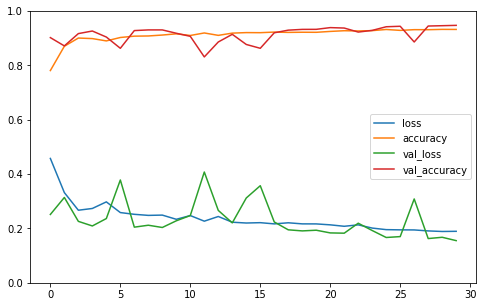

In [19]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid = True
plt.gca().set_ylim(0,1)
plt.show()

In [20]:
model.evaluate(X_test, y_test)

178/178 [==============================] - 0s 1ms/step - loss: 0.1430 - accuracy: 0.9518


[0.14300668239593506, 0.9518433809280396]

## Real-world Test (r/shortscarystories and r/self)

In [21]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

In [22]:
text_creepy = """
Irene (not her real name) was my first non-bot tinder match in three months. Things moved pretty fast—we chatted, I offered to cook dinner (Spaghetti puttanesca), then we hooked up.

Irene was super hot but SUPER weird. She had a thick accent but insisted she grew up nearby, said it was a good night to make love because her ‘goddess cycle was aligned with the moons’, and totally starfished during sex.

I figured - no big deal, I’ll just do the adult thing and ghost her.

Well that pissed Irene off. She messaged calling me a fuckboy and said, ‘you’ll be sorry’. I blocked her number, but the messages didn’t stop. Eventually she baited me into replying:

Her: Since you’re alone tonight how about we have a little fun? 😉

Me: I’m not alone. My housemates here. (I was lying.)

Her: Surrrrrreeeeee.

My bedroom door creaked open. From behind it something whispered, ‘JJJJJJJJJJTTTTTTTBBBBBBBBBB6666666888888885555555’.

I thought maybe my housemate had come back and went to check it out. A dark figure almost as tall as the ceiling was creeping through the hall. I closed my bedroom door and locked it.

My phone dinged.

Her: I see you’ve met the other man in my life 😊

I thought, no big deal—just my imagination, or maybe a nightmare. I’ll stay here and everything’ll be alright in the morning.

But I really needed to pee. Rather than wander through the empty house, I climbed out the window and urinated in the garden.

When I returned, my phone dinged again.

Her: What’s wrong? Afraid to go to the bathroom by yourself?

Her: Look out the window. He’s outside. 😉

The ‘figure’ appeared out of nowhere. Whatever it was, it wasn’t human. This is the only way I can describe it: picture a living shadow with pale eyes and a tongue that doesn’t fit in its mouth.

It licked the window; I staggered back. The window opened (I don’t know how - it doesn’t unlock from the outside) and the figure poked its grinning head past the frame and into the room. I messaged Irene.

Me: I’m sorry. Please make it stop. I’ll do ANYTHING.

Her: I wish I could, but he hates seeing me upset. 😢 If only something cheered me up…Oh well…

The figure climbed through the window and crawled along the floor, dragging its grotesque tongue across the carpet. It stood, leaned over me, then rocked it’s head like a seesaw.

Me: Free tomorrow evening?

Immediately the shadow turned and climbed back out the window.

Her: Pick me up at eight. And we better have a magical time…Or else. X.

So now we’re meeting tonight, and I have no idea what to do. I absolutely DO NOT want to date a girl who summons demons and probably gives shitty blowjobs.

I need to figure out a way to make her both enjoy the date and never want to see me again.

If anyone has any suggestions, I’d really really appreciate it…
"""

text_non_creepy = """
a few years ago my grandfather died and grandma was left to deal with finances for the first time in her life. mentally she was always sharp but in the months after his death she was so vulnerable. during this time some phone scammers managed to get her locked into a contract so she had to pay an extra $500/mo for electricity. i was royally pissed to say the least. worst of all, i couldn't do anything about it. eventually she was able to get out of the contract but not before she paid them thousands of dollars.

as revenge, when someone tries to scam me i waste as much of their time as possible. i figure if i can slow them down for just 10-20 min it might be saving some other poor old lady from being taken advantage of. when i first started it wasn't easy. i could only keep them on the line for a few min before i broke down and started swearing at them. then i learned to keep my cool but they have ways of figuring out who is legit so i could only keep them on the line for 5 min before they would hang up. it sort of became a game where i would slowly figure out what they wanted to hear. with each call i get a little better. today i managed to keep them for 30+ min before they got frustrated and hung up.

if everyone did this it would slow them down a lot. many old ladies would be saved.
"""

In [23]:
creepy_vec = np.concatenate(([np.log(1310+1+0.01)],sbert_model.encode(text_creepy)))
non_creepy_vec = np.concatenate(([np.log(1136+1+0.01)],sbert_model.encode(text_non_creepy)))
vecs = np.array([creepy_vec, non_creepy_vec])
vecs

array([[ 7.17855311,  0.99887389, -0.1818566 , ..., -0.11338365,
         0.32053056, -0.53172892],
       [ 7.03615729,  0.28519672, -0.21132576, ...,  0.2008417 ,
        -0.19763832, -0.22631331]])

In [28]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_vecs = scaler.fit_transform(vecs)

In [32]:
import sys
np.set_printoptions(threshold=100)
scaled_vecs

array([[1., 1., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [33]:
model.predict(scaled_vecs)

array([[0.00936089],
       [0.99898547]], dtype=float32)

In [34]:
model

Failed